About Dataset
Context
The online hotel reservation channels have dramatically changed booking possibilities and customers’ behavior. A significant number of hotel reservations are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with.

Can you predict if the customer is going to honor the reservation or cancel it ?

In [337]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy import stats


In [338]:
df=pd.read_csv("Hotel Reservations.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [339]:
df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


# Exploratory data analysis

# 1-Lets check the number of rows and columns in dataset 

In [340]:
df.shape

(36275, 19)

# 2-Null Value Analysis

In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

# Here No Null values are present

# 3-Lets check the variance of the independent features

In [342]:
df.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

# Booking_id is unique for every person hence gives no menaingful insights hence can drop this column

In [343]:
df.drop(columns=['Booking_ID'],inplace=True)

# Lets check the Visualisations with respect to taraget column "booking_status"

# Count plot analysis of independent feature type_of_meal_plan

average price for cancellation and non cancellation are almost same but this feature has lots of outliers

Text(0.5, 1.0, 'Meal Plan Distribution')

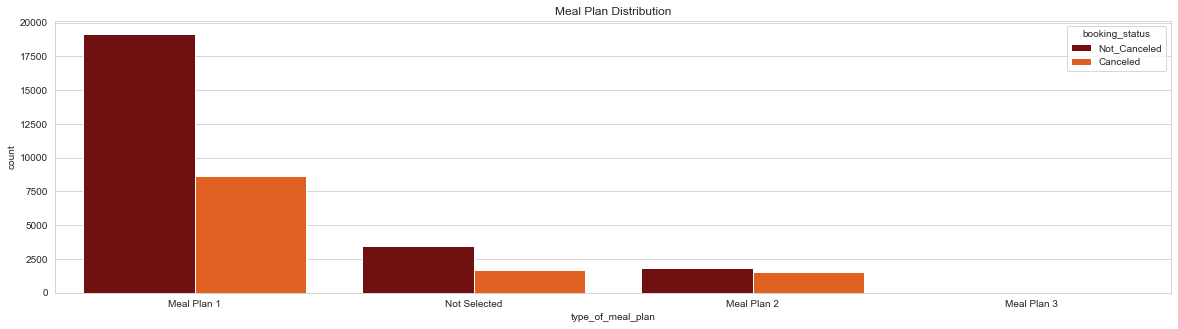

In [344]:
plt.rcParams["figure.figsize"] = (20,5)
sns.countplot(x="type_of_meal_plan", hue="booking_status", data=df, palette="gist_heat")
plt.title("Meal Plan Distribution")

Mostly people prefer meal plan 1 if they dont cancel their booking

here we see that Meal plan 3 contribution is nearly zero hence this row can be dropped

In [345]:
df['type_of_meal_plan'].replace('Meal Plan 3',np.nan,inplace=True)
df.dropna(axis=0,how='any',thresh=None,subset='type_of_meal_plan',inplace=True)

In [346]:
df['type_of_meal_plan'].value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Name: type_of_meal_plan, dtype: int64

In [347]:
df.shape

(36270, 18)

# Count plot analysis of independent feature market segment type

Text(0.5, 1.0, 'Market Segment Distribution')

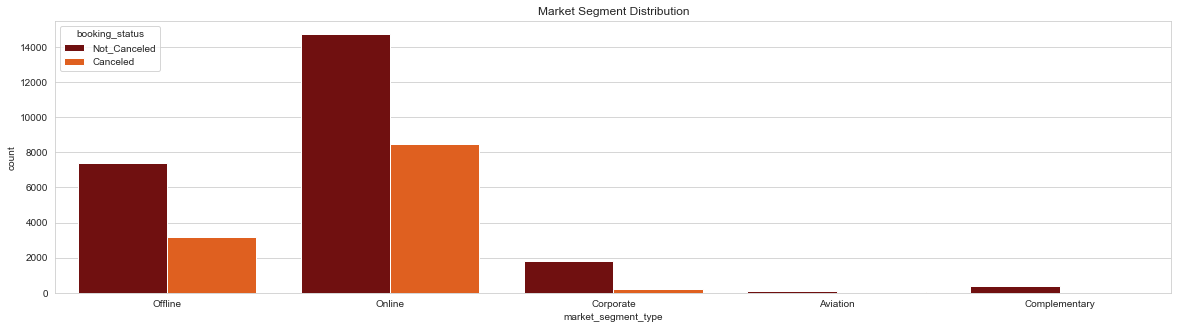

In [348]:
plt.rcParams["figure.figsize"] = (20,5)
sns.countplot(x="market_segment_type", hue="booking_status", data=df, palette="gist_heat")
plt.title("Market Segment Distribution")

In [349]:
df['market_segment_type'].replace(['Corporate','Aviation','Complementary'],[np.nan,np.nan,np.nan],inplace=True)
df.dropna(axis=0,how='any',thresh=None,subset='market_segment_type',inplace=True)

In [350]:
df['market_segment_type'].value_counts()

Online     23214
Offline    10527
Name: market_segment_type, dtype: int64

In [351]:
df.shape

(33741, 18)

# Count plot analysis of independent feature room_type_reserved

The Maximum data of booking cancelled and not cancelled is obtained from online booking and offline booking and hence rest are outliers

Text(0.5, 1.0, 'room_type_reserved')

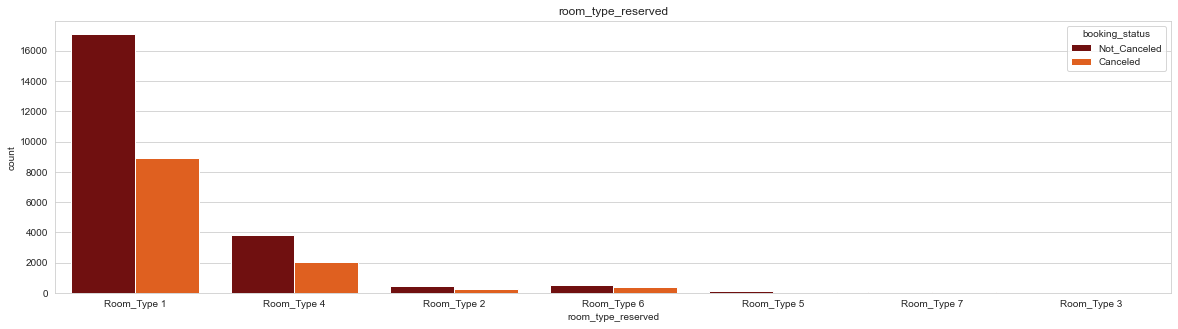

In [352]:
plt.rcParams["figure.figsize"] = (20,5)
sns.countplot(x="room_type_reserved", hue="booking_status", data=df, palette="gist_heat")
plt.title("room_type_reserved")

In [353]:
round(((df['room_type_reserved'].value_counts())/len(df))*100,2)

Room_Type 1    77.02
Room_Type 4    17.31
Room_Type 6     2.81
Room_Type 2     1.99
Room_Type 5     0.52
Room_Type 7     0.34
Room_Type 3     0.01
Name: room_type_reserved, dtype: float64

The visualisation and percentage of contribution tells us that Room_type_5,Room_type_7,Room_type_3 contribution is nearly equal to zero hence will drop these rows

The maximum booking belongs to Room_Type_1 and sometimes customers also prefer Room_type_4 

In [354]:
df['room_type_reserved'].value_counts()

Room_Type 1    25989
Room_Type 4     5841
Room_Type 6      949
Room_Type 2      670
Room_Type 5      174
Room_Type 7      114
Room_Type 3        4
Name: room_type_reserved, dtype: int64

In [355]:
df['room_type_reserved'].replace(['Room_Type 6','Room_Type 2','Room_Type 5','Room_Type 7','Room_Type 3'],[np.nan,np.nan,np.nan,np.nan,np.nan],inplace=True)
df.dropna(axis=0,how='any',thresh=None,subset='room_type_reserved',inplace=True)

In [356]:
df.shape

(31830, 18)

# Count plot analysis of independent feature repeated_guests

Text(0.5, 1.0, 'repeated_guest')

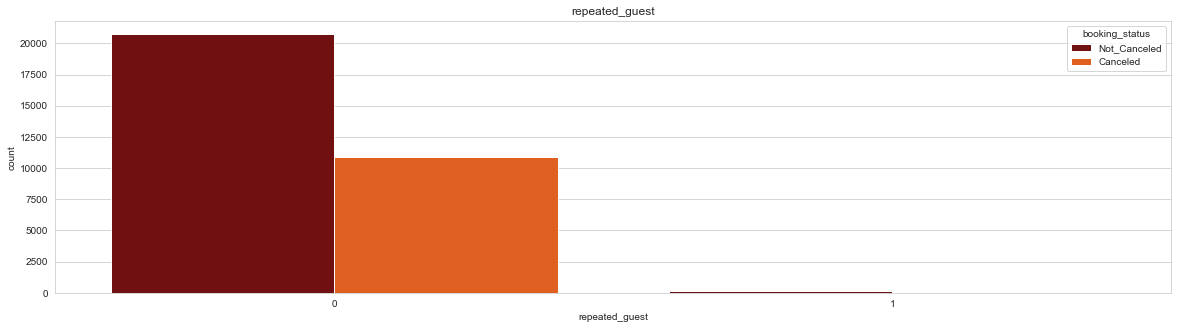

In [357]:
plt.rcParams["figure.figsize"] = (20,5)
sns.countplot(x="repeated_guest", hue="booking_status", data=df, palette="gist_heat")
plt.title("repeated_guest")

lets check these values in percentage

In [358]:
round(((df['repeated_guest'].value_counts())/len(df))*100,2)

0    99.43
1     0.57
Name: repeated_guest, dtype: float64

In [359]:
df.drop(columns=['repeated_guest'],inplace=True)

In [360]:
df.shape

(31830, 17)

Since 97% of value belongs to category 0 this feature has nearly zero variance hence will drop this feature

# Count plot analysis of independent feature no_of_adults

Text(0.5, 1.0, 'no_of_adults')

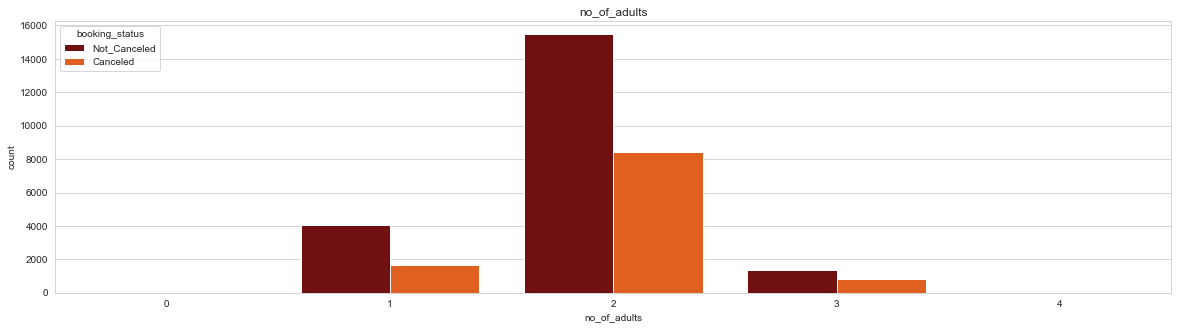

In [361]:
plt.rcParams["figure.figsize"] = (20,5)
sns.countplot(x="no_of_adults", hue="booking_status", data=df, palette="gist_heat")
plt.title("no_of_adults")

In [362]:
round(((df['no_of_adults'].value_counts())/len(df))*100,2)

2    75.13
1    17.93
3     6.93
0     0.01
4     0.00
Name: no_of_adults, dtype: float64

In [363]:
df['no_of_adults'].replace([0,4],[np.nan,np.nan],inplace=True)
df.dropna(axis=0,how='any',thresh=None,subset='no_of_adults',inplace=True)

In [364]:
df.shape

(31827, 17)

In [365]:
df['no_of_adults'].value_counts()

2.0    23915
1.0     5706
3.0     2206
Name: no_of_adults, dtype: int64

# Count plot analysis of independent feature no_of_children

Text(0.5, 1.0, 'no_of_children')

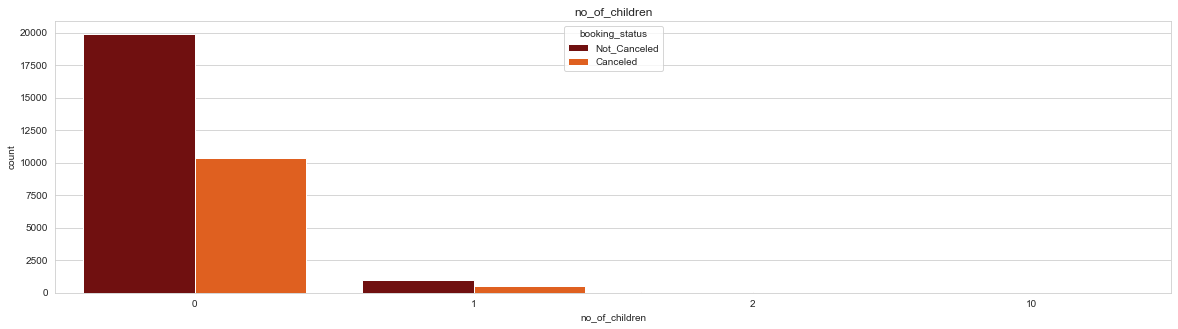

In [366]:
plt.rcParams["figure.figsize"] = (20,5)
sns.countplot(x="no_of_children", hue="booking_status", data=df, palette="gist_heat")
plt.title("no_of_children")

In [367]:
round(((df['no_of_children'].value_counts())/len(df))*100,2)

0     95.19
1      4.67
2      0.14
10     0.00
Name: no_of_children, dtype: float64

In [368]:
df['no_of_children'].replace([10],[np.nan],inplace=True)
df.dropna(axis=0,how='any',thresh=None,subset='no_of_children',inplace=True)

In [369]:
df['no_of_children'].value_counts()

0.0    30296
1.0     1485
2.0       45
Name: no_of_children, dtype: int64

In [370]:
df.shape

(31826, 17)

# Count plot analysis of independent feature no_of_weekend_nights

Text(0.5, 1.0, 'no_of_weekend_nights')

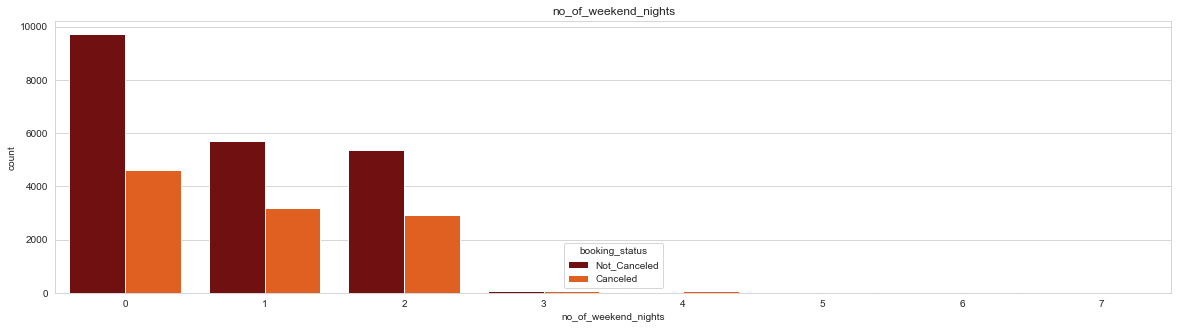

In [371]:
plt.rcParams["figure.figsize"] = (20,5)
sns.countplot(x="no_of_weekend_nights", hue="booking_status", data=df, palette="gist_heat")
plt.title("no_of_weekend_nights")

here no of weekend_nights beyond 2 are outliers lets remove these

In [372]:
df['no_of_weekend_nights'].replace([5,6,7],[np.nan,np.nan,np.nan],inplace=True)
df.dropna(axis=0,how='any',thresh=None,subset='no_of_weekend_nights',inplace=True)

# Count plot analysis of independent feature no_of_week_nights

Text(0.5, 1.0, 'no_of_week_nights')

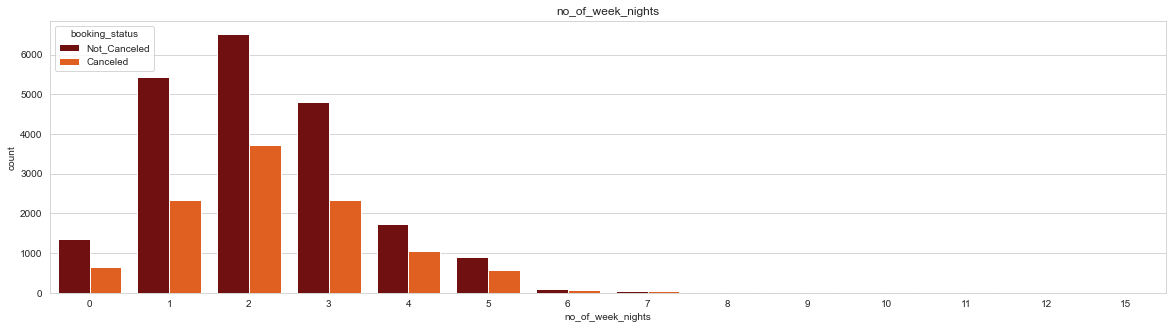

In [373]:
plt.rcParams["figure.figsize"] = (20,5)
sns.countplot(x="no_of_week_nights", hue="booking_status", data=df, palette="gist_heat")
plt.title("no_of_week_nights")

# Count plot analysis of independent feature arrival_month

Text(0.5, 1.0, 'arrival_month')

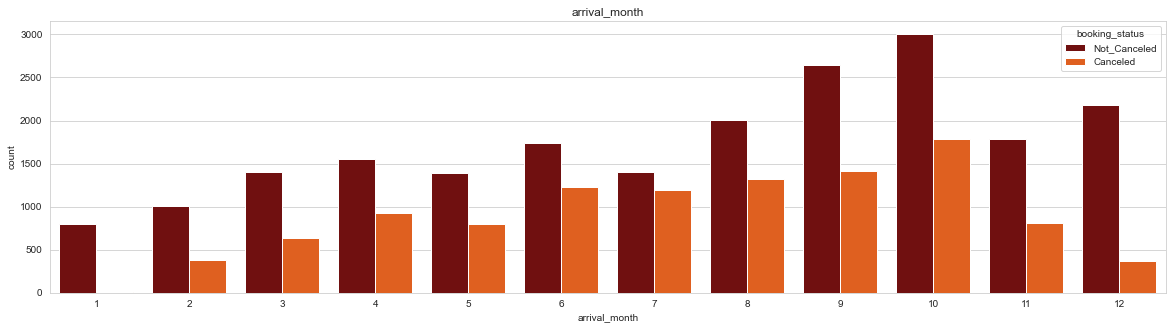

In [374]:
plt.rcParams["figure.figsize"] = (20,5)
sns.countplot(x="arrival_month", hue="booking_status", data=df, palette="gist_heat")
plt.title("arrival_month")

# Count plot analysis of independent feature arrival_year

Text(0.5, 1.0, 'arrival_year')

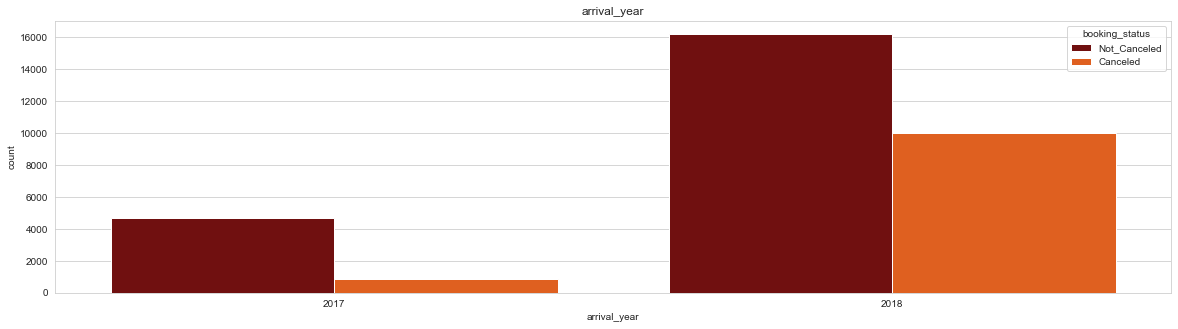

In [375]:
plt.rcParams["figure.figsize"] = (20,5)
sns.countplot(x="arrival_year", hue="booking_status", data=df, palette="gist_heat")
plt.title("arrival_year")

In [376]:
round(((df['arrival_year'].value_counts())/len(df))*100,2)

2018    82.42
2017    17.58
Name: arrival_year, dtype: float64

In [377]:
#here mostly booking was done in 2018 
df.drop(columns=['arrival_year'],inplace=True)

# percentage contribution of no_of_previous_cancellations

In [378]:
round(((df['no_of_previous_cancellations'].value_counts())/len(df))*100,2)

0     99.62
1      0.29
11     0.08
13     0.01
2      0.00
3      0.00
Name: no_of_previous_cancellations, dtype: float64

from here we get that 99% people did not cancel their bookings previously hence this column has nearly zero variance and hence we can drop this column

# Count plot analysis of independent feature no_of_previous_bookings_not_canceled

Text(0.5, 1.0, 'no_of_previous_bookings_not_canceled')

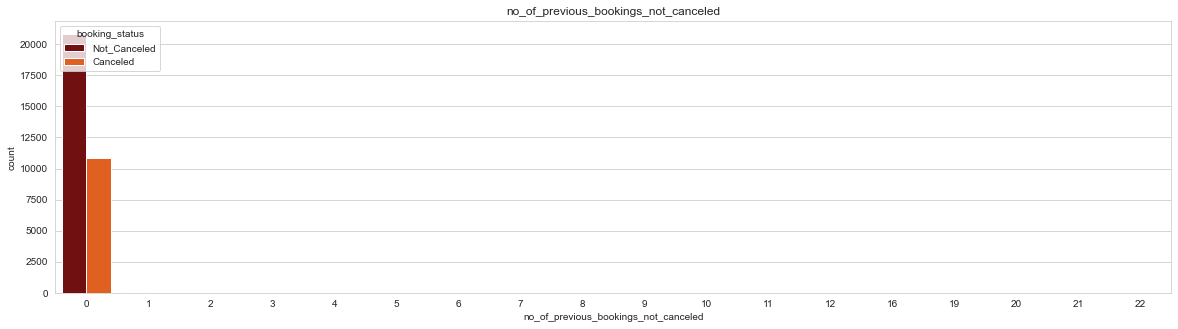

In [379]:
plt.rcParams["figure.figsize"] = (20,5)
sns.countplot(x="no_of_previous_bookings_not_canceled", hue="booking_status", data=df, palette="gist_heat")
plt.title("no_of_previous_bookings_not_canceled")

lets drop columns no_of_previous_cancellations,no_of_previous_bookings_not_canceled as they dosent of variety in columns

In [380]:
df.drop(columns=['no_of_previous_cancellations','no_of_previous_bookings_not_canceled'],inplace=True)

# Count plot analysis of independent feature no_of_special_requests

Text(0.5, 1.0, 'no_of_special_requests')

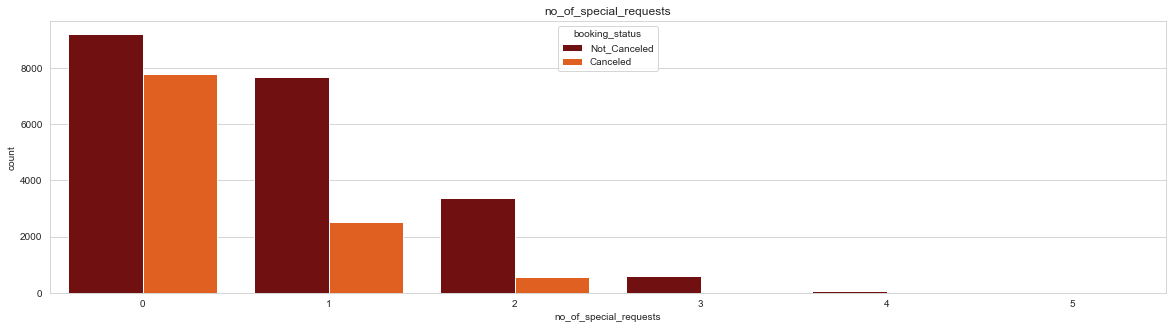

In [381]:
plt.rcParams["figure.figsize"] = (20,5)
sns.countplot(x="no_of_special_requests", hue="booking_status", data=df, palette="gist_heat")
plt.title("no_of_special_requests")

most customers with special request 1,2,3 are not willing to cancel their bookings where as customers with special request 0 may or may not cancel their boooking

# Count plot analysis of independent feature required_car_parking_space

In [382]:
 round(((df['required_car_parking_space'].value_counts())/len(df))*100,2)

0    97.47
1     2.53
Name: required_car_parking_space, dtype: float64

Text(0.5, 1.0, 'required_car_parking_space')

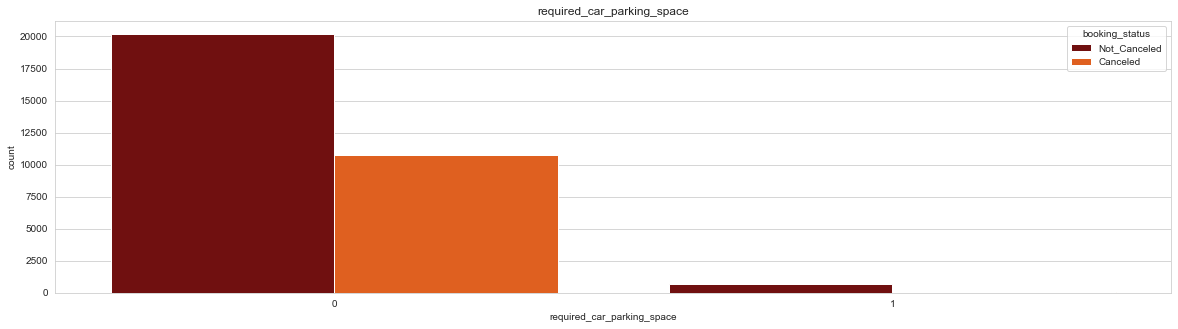

In [383]:
plt.rcParams["figure.figsize"] = (20,5)
sns.countplot(x="required_car_parking_space", hue="booking_status", data=df, palette="gist_heat")
plt.title("required_car_parking_space")

In [384]:
df.drop(columns=['required_car_parking_space'],inplace=True)

In [385]:
df.shape

(31787, 13)

In [386]:
df.head(2)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,avg_price_per_room,no_of_special_requests,booking_status
0,2.0,0.0,1.0,2,Meal Plan 1,Room_Type 1,224,10,2,Offline,65.00,0,Not_Canceled
1,2.0,0.0,2.0,3,Not Selected,Room_Type 1,5,11,6,Online,106.68,1,Not_Canceled


# 4-Lets check for categorcal values in independent features and target column

#Independent features such as 'type_of_meal_plan','room_type_reserved','market_segment_type','booking_status' are categorical in nature
#first we should convert it to numerical values As model dosent understand the categorical values

# Lets import one hot encoding from sk learn library and convert categorical features to numerical

In [387]:
from sklearn.preprocessing import OneHotEncoder 
#since here we have a problem of multicollinearity we will drop
ohe = OneHotEncoder(dtype=np.int32) #Initialising

In [388]:
df['type_of_meal_plan']=ohe.fit_transform(df[['type_of_meal_plan']]).toarray()
df['room_type_reserved']=ohe.fit_transform(df[['room_type_reserved']]).toarray()
df['market_segment_type']=ohe.fit_transform(df[['market_segment_type']]).toarray()
df['booking_status']=ohe.fit_transform(df[['booking_status']]).toarray()

# All the categorical values are converted to numerical value now we are good to go

In [389]:
df.head(10)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,avg_price_per_room,no_of_special_requests,booking_status
0,2.0,0.0,1.0,2,1,1,224,10,2,1,65.00,0,0
1,2.0,0.0,2.0,3,0,1,5,11,6,0,106.68,1,0
2,1.0,0.0,2.0,1,1,1,1,2,28,0,60.00,0,1
3,2.0,0.0,0.0,2,1,1,211,5,20,0,100.00,0,1
4,2.0,0.0,1.0,1,0,1,48,4,11,0,94.50,0,1
5,2.0,0.0,0.0,2,0,1,346,9,13,0,115.00,1,1
6,2.0,0.0,1.0,3,1,1,34,10,15,0,107.55,1,0
7,2.0,0.0,1.0,3,1,0,83,12,26,0,105.61,1,0
8,3.0,0.0,0.0,4,1,1,121,7,6,1,96.90,1,0
9,2.0,0.0,0.0,5,1,0,44,10,18,0,133.44,3,0


# 5- Lets check whether the data of target column is balanced or imbalanced

<AxesSubplot:xlabel='booking_status', ylabel='count'>

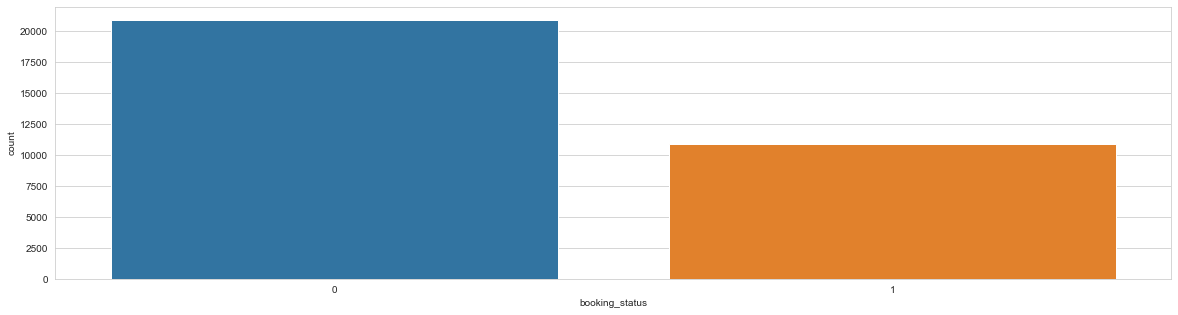

In [390]:
sns.set_style('whitegrid')
sns.countplot(x='booking_status',data=df)

In [391]:
round(((df['booking_status'].value_counts())/len(df))*100,2)

0    65.79
1    34.21
Name: booking_status, dtype: float64

# 6-Lets check thd data statistics

In [392]:
df.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
no_of_adults,31787.0,1.890427,0.485988,1.0,2.0,2.0,2.0,3.0
no_of_children,31787.0,0.049517,0.223379,0.0,0.0,0.0,0.0,2.0
no_of_weekend_nights,31787.0,0.827886,0.854614,0.0,0.0,1.0,2.0,4.0
no_of_week_nights,31787.0,2.236512,1.346709,0.0,1.0,2.0,3.0,15.0
type_of_meal_plan,31787.0,0.741026,0.438078,0.0,0.0,1.0,1.0,1.0
room_type_reserved,31787.0,0.816560,0.387033,0.0,1.0,1.0,1.0,1.0
lead_time,31787.0,91.064146,87.254122,0.0,22.0,64.0,135.0,443.0
arrival_month,31787.0,7.447416,3.030129,1.0,5.0,8.0,10.0,12.0
arrival_date,31787.0,15.539403,8.756861,1.0,8.0,15.0,23.0,31.0
market_segment_type,31787.0,0.325794,0.468678,0.0,0.0,0.0,1.0,1.0


In [393]:
#comparing mean and median we get to know there are outliers in the 'lead_time' and 'avg_price_per_room' columns lets trye to remove the outliers

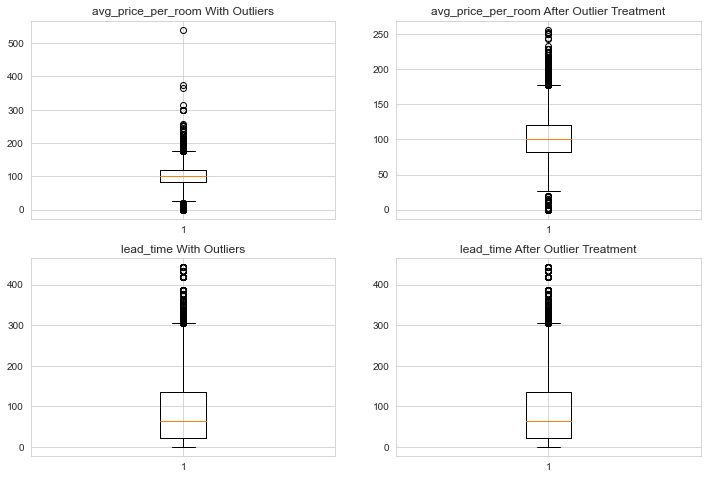

In [394]:
plt.figure(figsize=(12,8))
pc_cols=['avg_price_per_room','lead_time']
p=0
for j in range(len(pc_cols)):
    var=pc_cols[j]
    p=p+1
    plt.subplot(2, 2, p)
    plt.title(var+' With Outliers')
    plt.boxplot(df[var])
    Q1 = df[var].quantile(0.05)
    Q3 = df[var].quantile(0.90)
    IQR = Q3 - Q1
    df = df[(df[var] >= Q1 - 1.5*IQR) & (df[var] <= Q3 + 1.5*IQR)]
    p=p+1
    plt.subplot(2, 2, p)
    plt.title(var+' After Outlier Treatment')
    plt.boxplot(df[var])

# Lets  check the normal distribution of lead_time

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

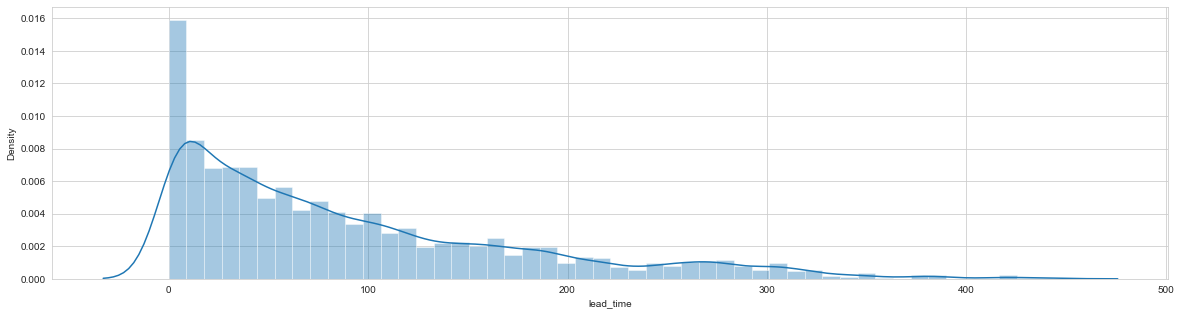

In [395]:
sns.distplot(df['lead_time'], label = 'lead_time')

In [396]:
df['lead_time'].kurtosis()

0.9727781691009785

In [397]:
df['lead_time'].skew()

1.222827384215275

lead_time is highly positively skewed that is most of the lead_time is below average we need to correct this

In [398]:
df['lead_time'] =np.sqrt(df['lead_time'])

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

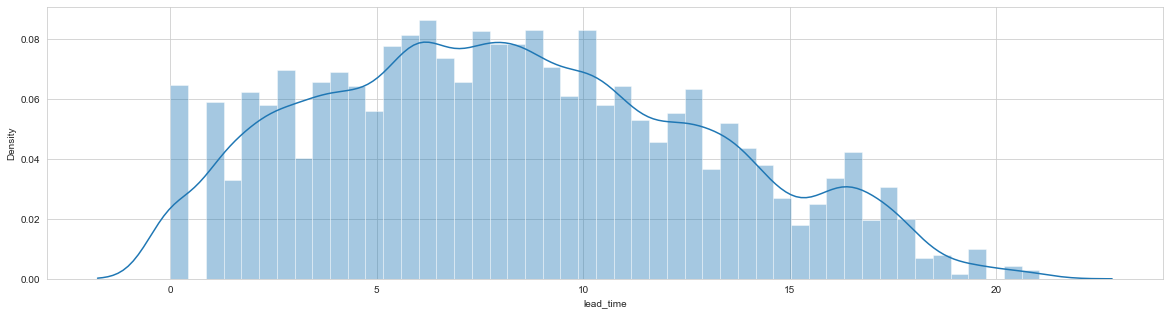

In [399]:
sns.distplot(df['lead_time'], label = 'lead_time')

# we have converted the column lead_time to nearly as a normal distribution curve

# Lets  check the normal distribution of avg_price_per_room

<AxesSubplot:xlabel='avg_price_per_room', ylabel='Density'>

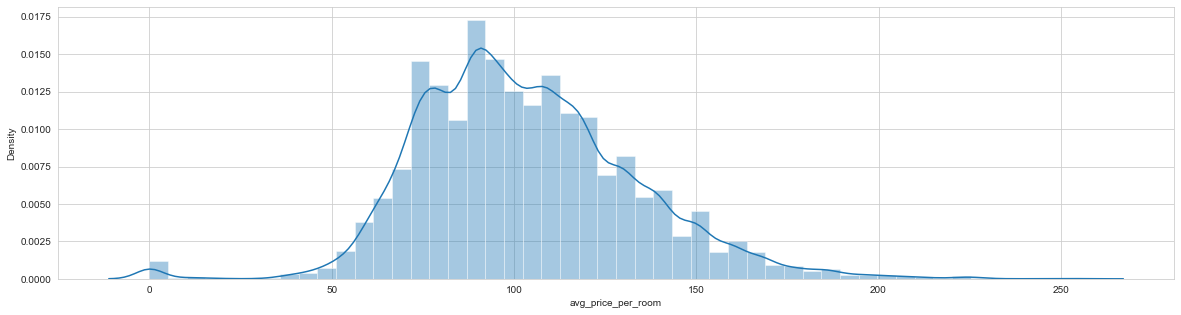

In [400]:
sns.distplot(df['avg_price_per_room'], label = 'avg_price_per_room')

In [401]:
df['avg_price_per_room'].kurt()

1.1576549948837767

In [402]:
df['avg_price_per_room'].skew()

0.39495697741978647

In [403]:
df['avg_price_per_room']=np.sqrt(df['avg_price_per_room'])

<AxesSubplot:xlabel='avg_price_per_room', ylabel='Density'>

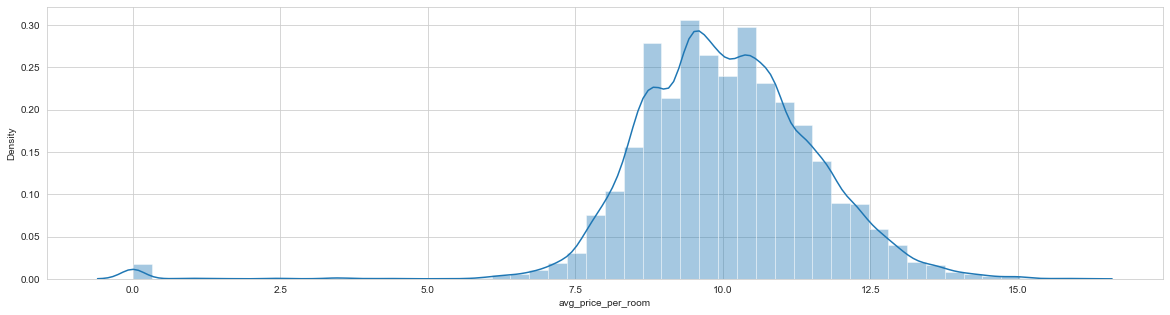

In [404]:
sns.distplot(df['avg_price_per_room'], label = 'avg_price_per_room')

In [405]:
len(df[df['avg_price_per_room']<7])

432

In [406]:
df=df[df['avg_price_per_room']>7]

<AxesSubplot:xlabel='avg_price_per_room', ylabel='Density'>

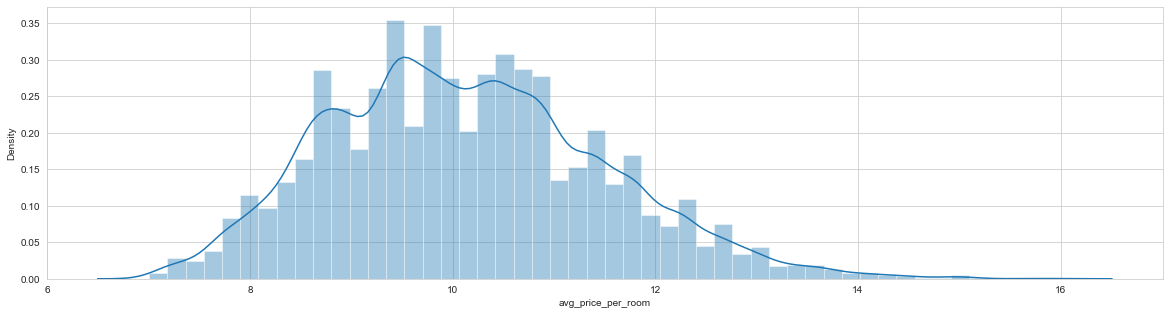

In [407]:
sns.distplot(df['avg_price_per_room'], label = 'avg_price_per_room')

# Now the distribution of avg_price_per_room looks fine

# 7-Lets check the correlation with the target column and independent features also among the independent features using heatmap

In [408]:
correlation = df.corr()
correlation['booking_status']

no_of_adults              0.050348
no_of_children           -0.004642
no_of_weekend_nights      0.037627
no_of_week_nights         0.054968
type_of_meal_plan        -0.045794
room_type_reserved       -0.002592
lead_time                 0.424322
arrival_month            -0.009873
arrival_date              0.005809
market_segment_type      -0.060214
avg_price_per_room        0.100443
no_of_special_requests   -0.275517
booking_status            1.000000
Name: booking_status, dtype: float64

<AxesSubplot:>

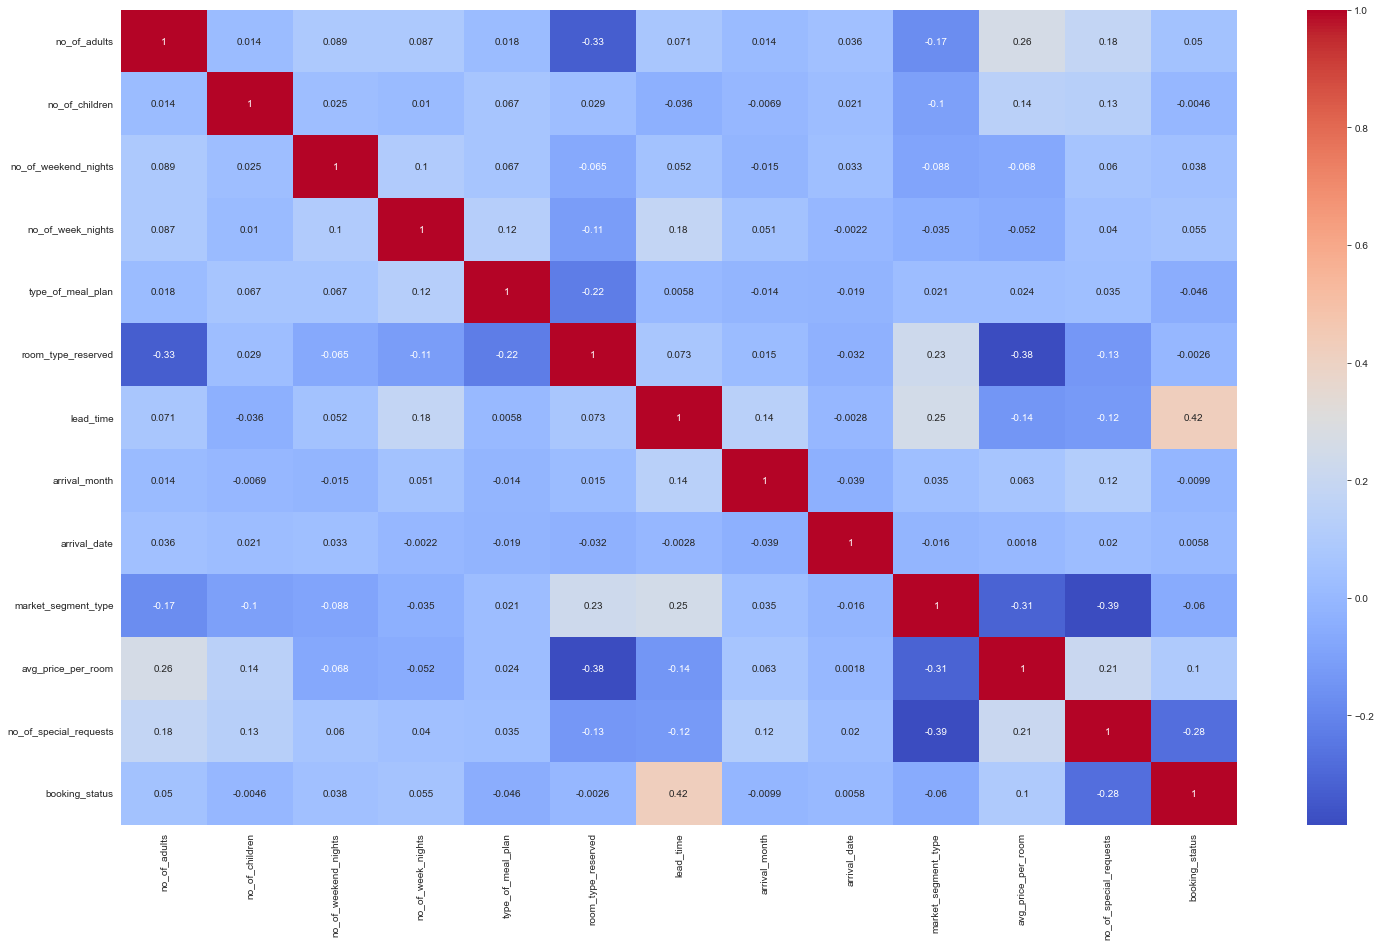

In [409]:
plt.figure(figsize=(25,15))
sns.heatmap(correlation,yticklabels=True,cbar=True,annot=True,cmap='coolwarm')

as correlation among independent features looks fine we go ahead and build the model

In [410]:
df.shape

(31347, 13)

# Modelling

In [411]:
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold

# test_train_split

In [412]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['booking_status'],axis=1), 
                                                    df['booking_status'], test_size=0.2, 
                                                    random_state=101)

In [413]:
print(x_train.shape)
print(x_test.shape)

(25077, 12)
(6270, 12)


In [414]:
x_test.head(2)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,avg_price_per_room,no_of_special_requests
20951,2.0,0.0,1.0,0,0,1,10.099505,10,9,0,10.392305,1
22672,2.0,0.0,1.0,2,1,1,13.892444,6,20,1,10.954451,0


In [415]:
y_test.head(2)

20951    0
22672    1
Name: booking_status, dtype: int32

In [416]:
scaled = StandardScaler()

# Modelling with Logistic Regression

In [417]:
logmodel = LogisticRegression()

Lets create the Pipeline

In [418]:
pipe = make_pipeline(scaled,logmodel)

In [419]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [420]:
y_predicted = pipe.predict(x_test)

In [421]:
y_predicted

array([0, 1, 0, ..., 0, 0, 1])

In [422]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85      4104
           1       0.73      0.65      0.69      2166

    accuracy                           0.79      6270
   macro avg       0.78      0.76      0.77      6270
weighted avg       0.79      0.79      0.79      6270



In [423]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predicted)

array([[3582,  522],
       [ 764, 1402]], dtype=int64)

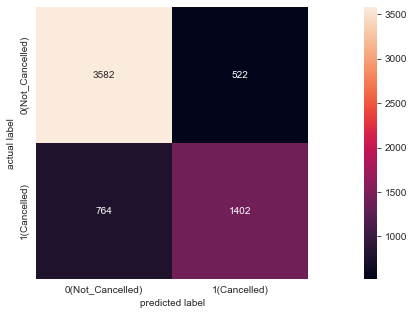

In [424]:
cnf_matrix = confusion_matrix(y_test,y_predicted)
np.set_printoptions(precision=2)
sns.heatmap(cnf_matrix, square=True, annot=True,fmt='d',  cbar=True,
                        xticklabels=['0(Not_Cancelled)', '1(Cancelled)'],
                        yticklabels=['0(Not_Cancelled)', '1(Cancelled)'])
plt.ylabel('actual label')
plt.xlabel('predicted label');

In [425]:
y_test.value_counts()

0    4104
1    2166
Name: booking_status, dtype: int64

In [426]:
from sklearn.metrics import roc_curve, auc

fpr_dt, tpr_dt, _ = roc_curve(y_test,y_predicted)
roc_auc_dt = auc(fpr_dt, tpr_dt)

y_predicted = pipe.predict(x_test)
x_predicted=pipe.predict(x_train)
print(y_predicted)
print(x_predicted)

[0 1 0 ... 0 0 1]
[1 0 0 ... 0 1 0]


<function matplotlib.pyplot.show(close=None, block=None)>

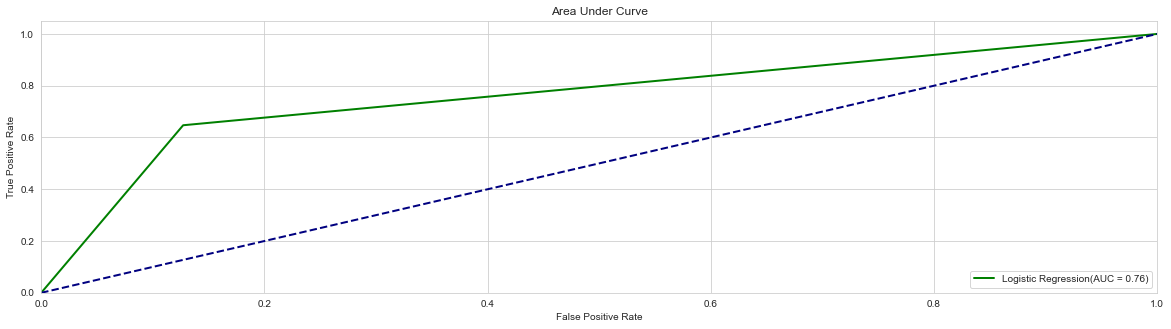

In [427]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Logistic Regression(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show

In [428]:
print('accuracy socre of training data :',accuracy_score(y_train, x_predicted))
print('accuracy socre of testing data:',accuracy_score(y_test, y_predicted))
print('f1 score:',f1_score(y_test, y_predicted))
print('precision score:',precision_score(y_test, y_predicted))
print('recall score:',recall_score(y_test, y_predicted))

accuracy socre of training data : 0.791322726003908
accuracy socre of testing data: 0.794896331738437
f1 score: 0.6855745721271395
precision score: 0.7286902286902287
recall score: 0.6472760849492152


# model check with decision tree

In [429]:
x_train=x_train.drop(columns=['no_of_weekend_nights'])
x_train

,no_of_adults,no_of_children,no_of_week_nights,type_of_meal_plan,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,avg_price_per_room,no_of_special_requests
7426,2.0,0.0,2,1,1,14.071247,9,9,0,9.486833,0
2117,2.0,0.0,1,1,1,6.782330,10,30,1,8.660254,0
30881,2.0,0.0,0,1,1,0.000000,12,28,0,10.295630,0
3324,1.0,0.0,3,1,1,3.741657,9,15,0,10.677078,1
16148,2.0,0.0,3,1,1,17.435596,11,3,1,9.433981,0
...,...,...,...,...,...,...,...,...,...,...,...
6561,2.0,0.0,3,1,1,2.000000,10,25,1,9.746794,0
9231,2.0,0.0,2,0,1,14.422205,7,30,0,8.986100,0
20513,2.0,0.0,3,1,1,15.394804,9,22,0,9.363226,2
20720,1.0,0.0,3,1,1,11.445523,6,19,0,10.767544,0


In [430]:
from sklearn.tree import DecisionTreeClassifier
clf_gini=DecisionTreeClassifier(criterion = "gini", 
                                        splitter = "random", 
                                        max_depth = 3,  
                                        min_samples_split = 50,
                                        min_samples_leaf = 50, 
                                        max_features = 5,
                                       random_state=206)
clf_gini=clf_gini.fit(x_train,y_train)

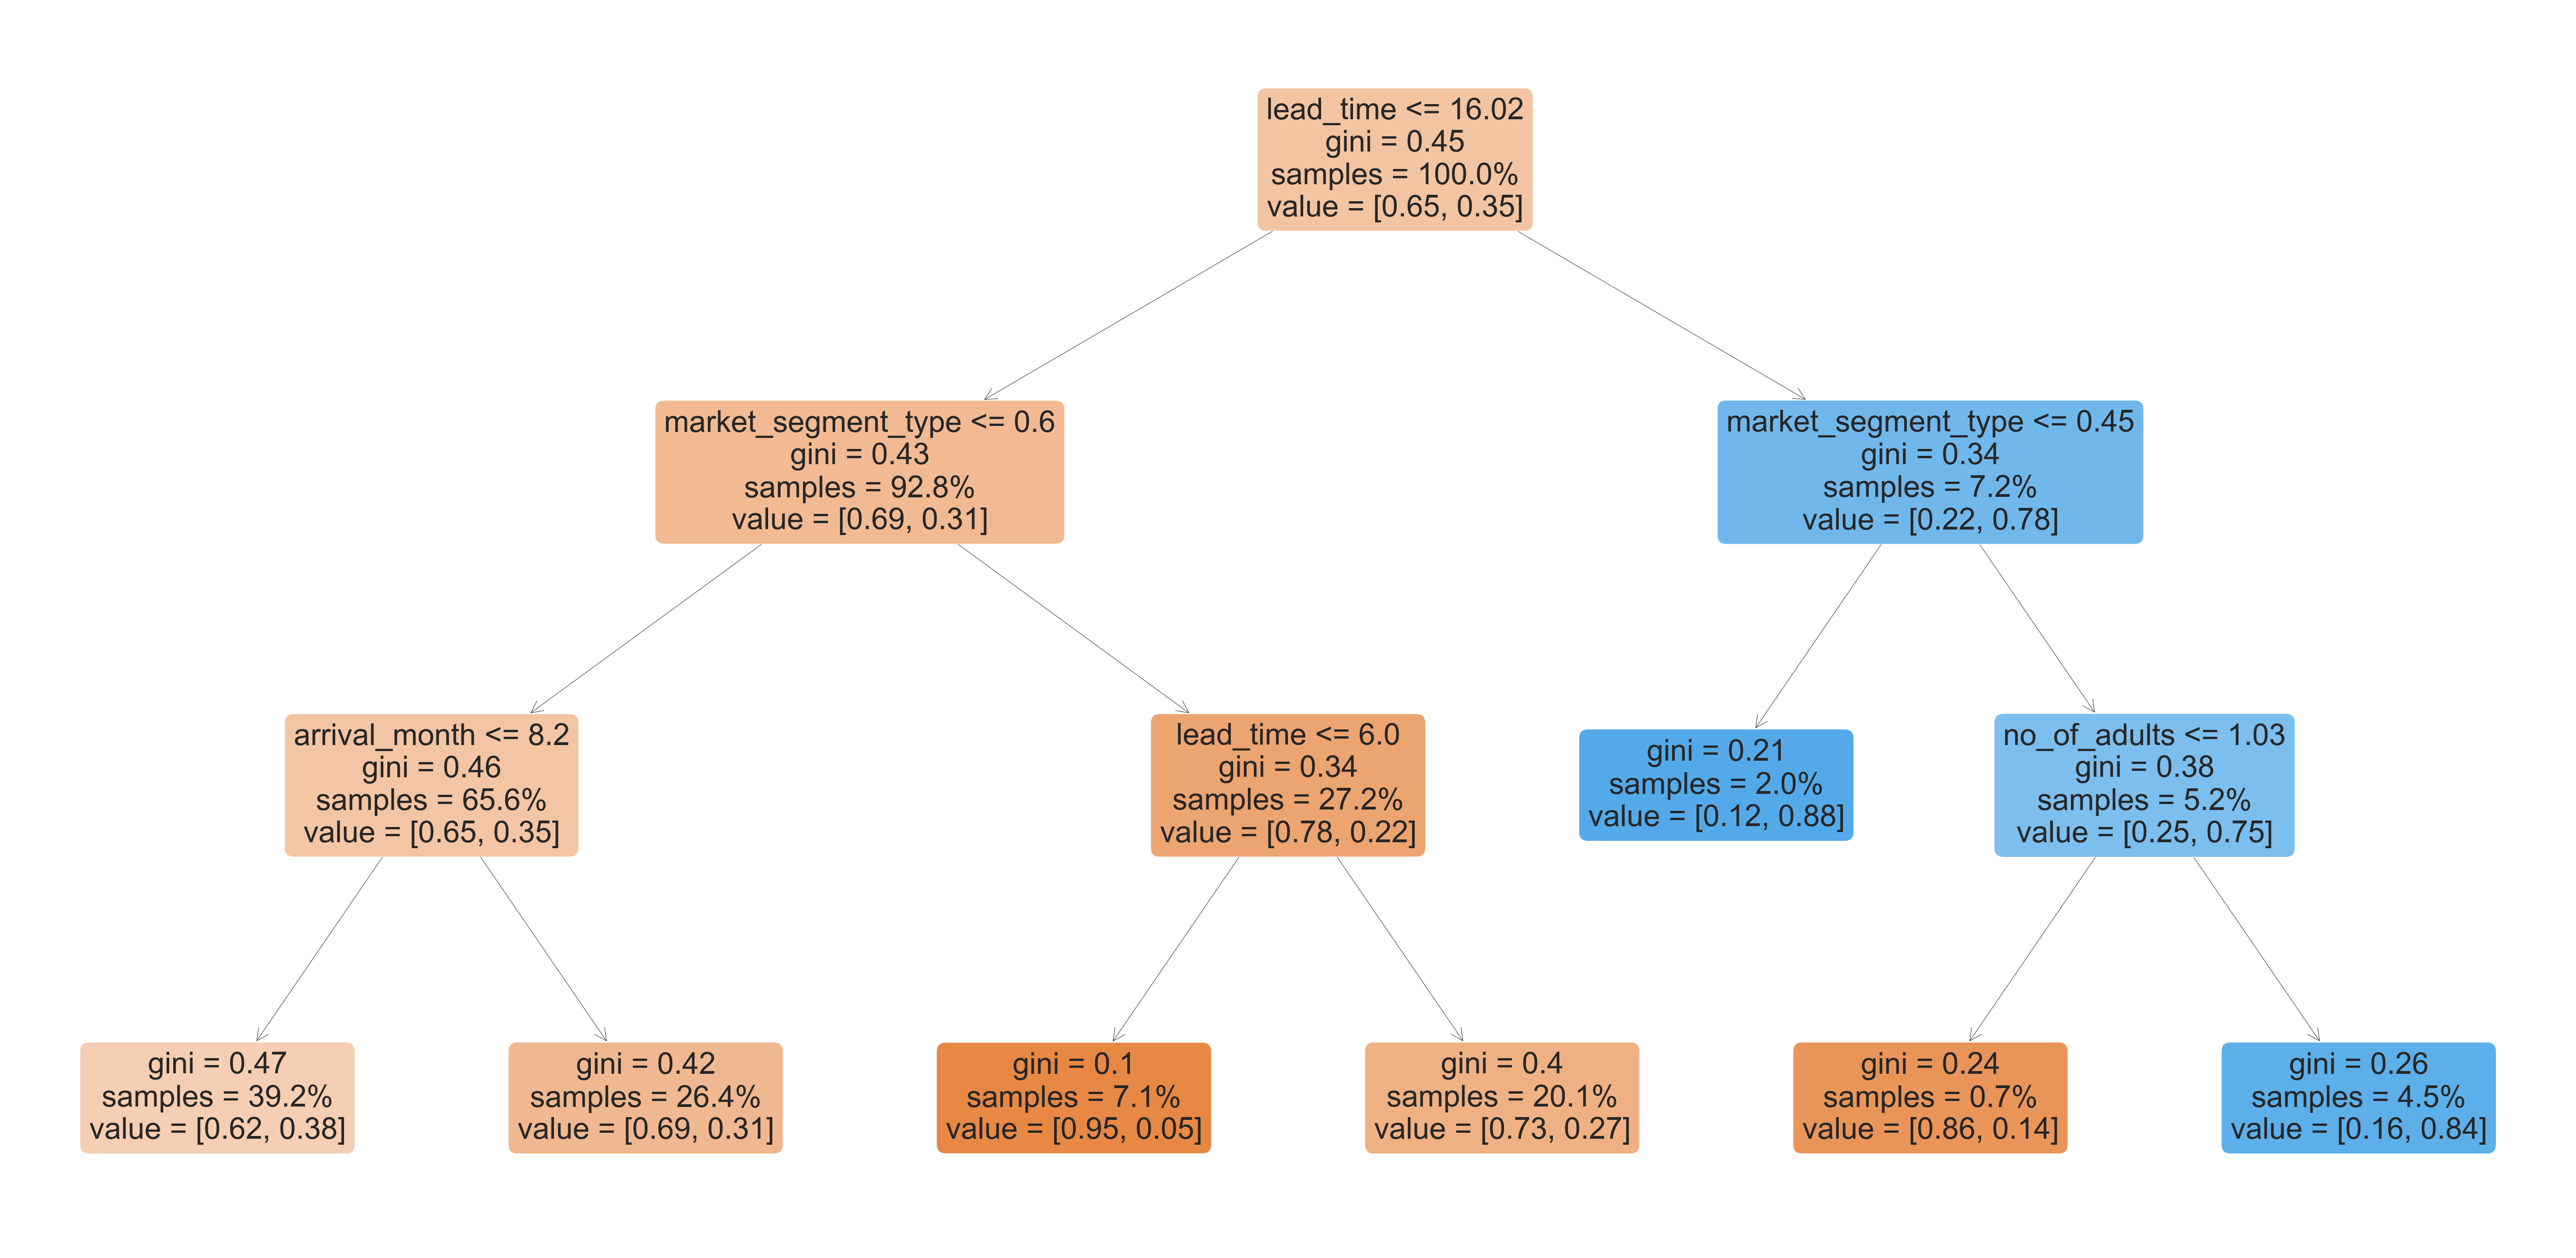

In [431]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(100,50))
from sklearn.tree import plot_tree
a=plot_tree(decision_tree=clf_gini,feature_names=x_train.columns,filled=True,precision=2,rounded=True,proportion=True)

#insights:
1. if lead_time is less than or equal to 8.08 and room_type_reserved is less than eqal to 0.67 and market segment is greater 
than 0.33 then the chances of booking not getting cancelled is 98%
2.if lead_time is less than or equal to 8.08 and room_type_reserved is greater than  0.67 and lead_time is less than 2.56
then the chances of booking not getting cancelled is 91%  and if lead time is greater than 2.56 then the chances of booking not 
getting cancelled is 80%
3.if lead_time is greater than  8.08 but less than 12.92 and no_of_special_requests is greater than 1.11 then the chances of booking not 
getting cancelled is 83%
4.if no_of_special_requests is greater than 2.96 then 100% booking will not be ccancelled
5.if no_of_special_requests is less than or equal to 2.96 and market_segment_type is greater than 0.6 and room_type_reserved 
is less than or equal to 0.38 then the chances of booking not getting cancelled is 93%
5.if avg_price_per_room is less than or equal to 9.32 and room_type_reserved is less than or equal to 0.54 
then the chances of booking not getting cancelled is 91%
6.if no_of_adults is 1 and type_of_meal_plan is 0 and arrival month is less than or equal to 6.7,
then the chances of booking not getting cancelled is 86%.
7.if no_of_adults is 1 and type_of_meal_plan is 0 and arrival month is greater than  6.7,
then the chances of booking not getting cancelled is 79%
8.If market_segment_type is greter than 0.76 and room_type_reserved is 0 and arrival_month is less than or equal to 6.93 then the chances of 
booking getting cancelled is 92%
9.If market_segment_type is greter than 0.76 and room_type_reserved is 0 and arrival_month is greater  than 6.93 then the chances of booking getting cancelled is 92%.







In [432]:
#df['no_of_weekend_nights'].value_counts()

In [433]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
        

In [434]:
import time
from sklearn.model_selection import GridSearchCV
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(dt_classifier, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 2)

cv_rf.fit(x_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 12, 'max_features': None}
Time taken in grid search:  119.12


In [435]:
dt_classifier = DecisionTreeClassifier(max_depth=12,max_features=None ,min_samples_leaf=10)
            
dt_classifier.fit(x_train,y_train)
pred_1 = dt_classifier.predict(x_train)
pred_2 = dt_classifier.predict(x_test)

print('classification report:\n\t',classification_report(pred_2,y_test))

ValueError: X has 12 features, but DecisionTreeClassifier is expecting 11 features as input.

In [ ]:
print('accuracy socre of training data:',accuracy_score(y_train, pred_1))
print('accuracy socre of testing data:',accuracy_score(y_test, pred_2))
print('f1 score:',f1_score(y_test, pred_2))
print('precision score:',precision_score(y_test, pred_2))
print('recall score:',recall_score(y_test, pred_2))

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix(y_test,pred_2)

In [ ]:
cnf_matrix = confusion_matrix(y_test,pred_2)
np.set_printoptions(precision=2)
sns.heatmap(cnf_matrix, square=True, annot=True,fmt='d',  cbar=True,
                        xticklabels=['0(Not_Cancelled)', '1(Cancelled)'],
                        yticklabels=['0(Not_Cancelled)', '1(Cancelled)'])
plt.ylabel('actual label')
plt.xlabel('predicted label');

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    dt_classifier, x_test, y_test, name="decisionAdaboost"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

# Modelling with Knn

In [ ]:
knn= KNeighborsClassifier(n_neighbors=14).fit(x_train,y_train)
y_knn_test=knn.predict(x_test)
y_knn_train=knn.predict(x_train)

In [ ]:
print('accuracy socre of training data:',accuracy_score(y_train,y_knn_train))
print('accuracy socre of testing data:',accuracy_score(y_test,y_knn_test))
print('f1 score:',f1_score(y_test, y_knn_test))
print('precision score:',precision_score(y_test,y_knn_test))
print('recall score:',recall_score(y_test,y_knn_test))

# Modelling with Gradient Boost

In [ ]:
gbm = GradientBoostingClassifier().fit(x_train,y_train)
y_gbm_test=gbm.predict(x_test)
y_gbm_train=gbm.predict(x_train)

In [ ]:
print('accuracy socre of training data:',accuracy_score(y_train,y_gbm_train))
print('accuracy socre of testing data:',accuracy_score(y_test,y_gbm_test))
print('f1 score:',f1_score(y_test, y_gbm_test))
print('precision score:',precision_score(y_test,y_gbm_test))
print('recall score:',recall_score(y_test,y_gbm_test))

In [ ]:
import xgboost as xgb
xg_model = xgb.XGBClassifier(random_state=1,
                             learning_rate=0.01)
xg_model.fit(x_train,y_train)

In [ ]:
pred_train = xg_model.predict(x_train)
pred_test = xg_model.predict(x_test)

In [ ]:
print('accuracy socre of training data:',accuracy_score(y_train,pred_train))
print('accuracy socre of testing data:',accuracy_score(y_test,pred_test))
print('f1 score:',f1_score(y_test, pred_test))
print('precision score:',precision_score(y_test,pred_test))
print('recall score:',recall_score(y_test,pred_test))

# Modelling with Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(max_depth=4, max_features=None,
                                                      min_samples_leaf=50)


RF_classifier.fit(x_train,y_train)
pred_3 = dt_classifier.predict(x_train)
pred_4 = dt_classifier.predict(x_test)

print('classification report:\n\t',classification_report(pred_4,y_test))

In [ ]:
print('accuracy socre of training data:',accuracy_score(y_train, pred_3))
print('accuracy socre of testing data:',accuracy_score(y_test, pred_4))
print('f1 score:',f1_score(y_test, pred_4))
print('precision score:',precision_score(y_test, pred_4))
print('recall score:',recall_score(y_test, pred_4))